# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:purple">Criação de um modelo de regressão linear para prever a renda de pessoas físicas com base em diversas características pessoais e socioeconômicas.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:purple">Primeiro, vamos carregar os dados e entender a estrutura deles.</span>


### Dicionário de dados


| Variável                | Descrição                                            | Tipo         |
| ----------------------- |:----------------------------------------------------:| ------------:|
|data_ref                |  Data de referência de coleta das variáveis           | object       |
|id_cliente              |  Código de identificação do cliente                   | int64        |
|sexo                    |  Sexo do cliente                                      | object       |
|posse_de_veiculo        |  Indica se o cliente possui veículo                   | bool         |
|posse_de_imovel         |  Indica se o cliente possui imóvel                    | bool         | 
|qtd_filhos              |  Quantidade de filhos do cliente                      | int64        |
|tipo_renda              |  Tipo de renda do cliente                             | object       |
|educacao                |  Grau de instrução do cliente                         | object       |
|estado_civil            |  Estado civil do cliente                              | object       |
|tipo_residencia         |  Tipo de residência do cliente (própria, alugada etc) | object       |
|idade                   |  Idade do cliente                                     | int64        |
|tempo_emprego           |  Tempo no emprego atual                               | float64      |
|qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência        | float64      |
|renda                   |  Renda em reais                                       | float64      |



#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:purple">Abaixo os pacotes necessários para o projeto</span>


In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import statsmodels.formula.api as smf
import statsmodels.api as sm

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:purple">Os dados serão carregados e divididos em base de treino e teste, baseada na data de referência.</span>


In [211]:
# Carregar os dados
renda = pd.read_csv('./input/previsao_de_renda.csv')
renda.head()

# Separar em treino e teste
renda_treino = renda.query("data_ref < '2016-01-01'")
renda_teste = renda.query("data_ref >= '2016-01-01'")

C:\Users\mdepontes\AppData\Local\anaconda3\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [217]:
# Gerar relatório de entendimento dos dados
prof = ProfileReport(renda_treino, explorative=True, minimal=True)
prof.to_file('./output/renda_analisys.html')

C:\Users\mdepontes\AppData\Local\anaconda3\Lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Entendimento dos dados - Bivariadas




<span style="color:purple">As análises bivariadas abaixo mostram diferenças importantes entre rendas, segundo as variváveis como "tipo de renda", "educação" e "idade". Em cada uma delas é possível observar uma diferença significativa onde a renda se apresenta maior para o sexo masculino e menor para o sexo feminino. Assim como segundo os dados apresentados nesta analise, homens representção maioria nos diversos cenários educacionais, conforme apresenta o segundo grafico a baixo.</span>


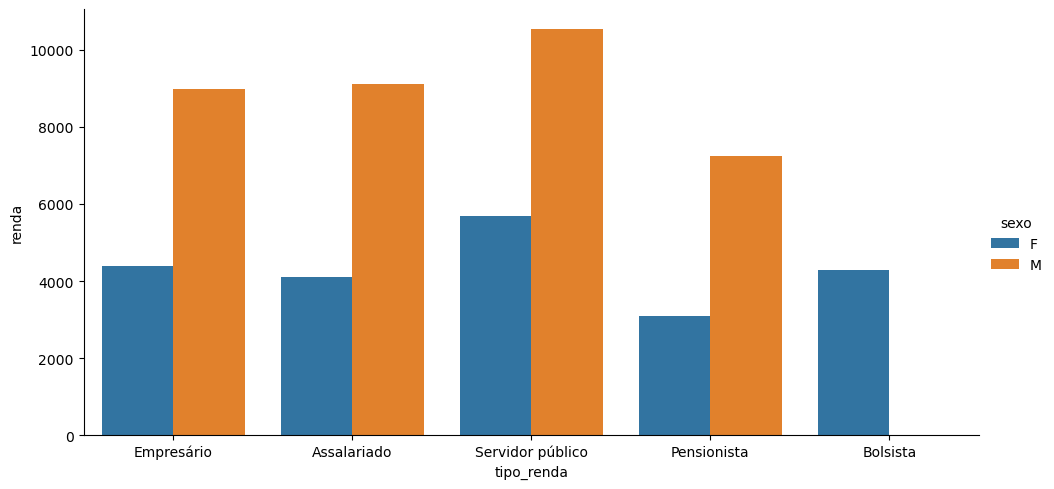

In [23]:
sns.catplot(x='tipo_renda', y='renda'
            , hue = 'sexo'
            , kind='bar'
            , estimator = 'mean'
            , data=renda_treino
            , errorbar=None
            , aspect=2
           )

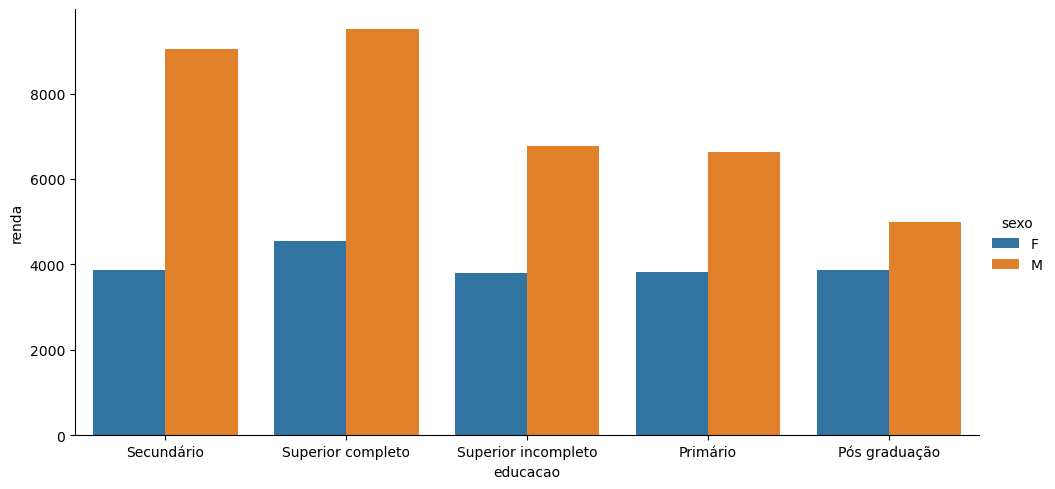

In [25]:
sns.catplot(x='educacao', y='renda'
            , hue = 'sexo'
            , kind='bar'
            , estimator = 'mean'
            , data=renda_treino
            , errorbar=None
            , aspect=2
           )

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:purple">Preparar os dados para a modelagem</span>


In [221]:
renda_treino['tempo_emprego'].fillna(renda_treino['tempo_emprego'].mean(), inplace=True)
renda_teste['tempo_emprego'].fillna(renda_teste['tempo_emprego'].mean(), inplace=True)

C:\Users\mdepontes\AppData\Local\Temp\ipykernel_17548\1329242686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_treino['tempo_emprego'].fillna(renda_treino['tempo_emprego'].mean(), inplace=True)
C:\Users\mdepontes\AppData\Local\Temp\ipykernel_17548\1329242686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_teste['tempo_emprego'].fillna(renda_teste['tempo_emprego'].mean(), inplace=True)


In [223]:
renda_treino = renda_treino.query('renda < 20000')
renda_teste = renda_teste.query('renda < 20000')

In [225]:
renda_treino.drop(columns=['qt_pessoas_residencia'], inplace=True)
renda_teste.drop(columns=['qt_pessoas_residencia'], inplace=True)

C:\Users\mdepontes\AppData\Local\Temp\ipykernel_17548\571132450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_treino.drop(columns=['qt_pessoas_residencia'], inplace=True)


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:purple">Para a construção do modelo, utilizaremos regressão linear. Vamos criar um modelo inicial e avaliar seu desempenho.
</span>


In [237]:
import statsmodels.formula.api as smf

# Definindo o modelo de regressão linear
modelo = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data=renda_treino).fit()

# Sumário do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     196.7
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:31:20   Log-Likelihood:            -1.0988e+05
No. Observations:               11588   AIC:                         2.198e+05
Df Residuals:                   11564   BIC:                         2.200e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### Rodando o modelo


<span style="color:purple">Vamos avaliar o modelo utilizando os dados de teste.</span>


In [243]:
import statsmodels.formula.api as smf

# Definindo o modelo de regressão linear
modelo = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data=renda_treino).fit()

# Sumário do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     196.7
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:32:28   Log-Likelihood:            -1.0988e+05
No. Observations:               11588   AIC:                         2.198e+05
Df Residuals:                   11564   BIC:                         2.200e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [247]:
# Fazendo previsões nos dados de teste
predicoes = modelo.predict(renda_teste)

# Comparando as previsões com os valores reais
comparacao = pd.DataFrame({'Real': renda_teste['renda'], 'Previsto': predicoes})

# Calculando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(comparacao['Real'], comparacao['Previsto'])
print(f'Erro Médio Absoluto: {mae}')

Erro Médio Absoluto: 2382.2943628833973


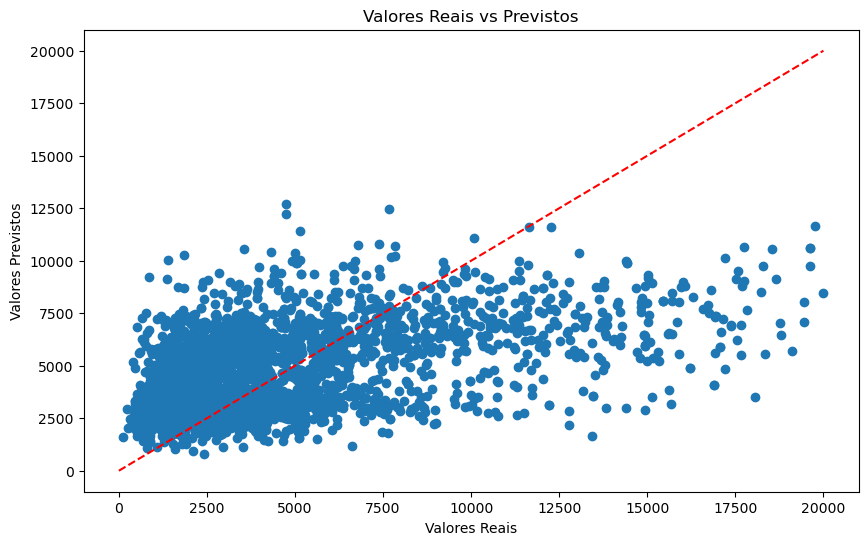

In [249]:
plt.figure(figsize=(10, 6))
plt.scatter(comparacao['Real'], comparacao['Previsto'])
plt.plot([0, 20000], [0, 20000], color='red', linestyle='--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Previstos')
plt.show()

In [251]:
import joblib

# Salvando o modelo
joblib.dump(modelo, './output/modelo_renda.pkl')

['./output/modelo_renda.pkl']

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


In [271]:
# Avaliar o modelo com os dados de teste
renda_teste['pred_renda'] = reg.predict(renda_teste)

# Métricas de avaliação
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(renda_teste['renda'], renda_teste['pred_renda'])
r2 = r2_score(renda_teste['renda'], renda_teste['pred_renda'])

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 10144069.72398224
R^2 Score: 0.24591585825720075


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [273]:
import streamlit as st

# Carregar os dados novamente
renda = pd.read_csv('./input/previsao_de_renda.csv')

# Separar em treino e teste
renda_treino = renda.query("data_ref < '2016-01-01'")
renda_teste = renda.query("data_ref >= '2016-01-01'")

# Tratar dados faltantes e remover outliers
renda_treino['tempo_emprego'].fillna(renda_treino['tempo_emprego'].mean(), inplace=True)
renda_teste['tempo_emprego'].fillna(renda_teste['tempo_emprego'].mean(), inplace=True)
renda_treino = renda_treino.query('renda < 20000')
renda_teste = renda_teste.query('renda < 20000')
renda_treino.drop(columns=['qt_pessoas_residencia'], inplace=True)
renda_teste.drop(columns=['qt_pessoas_residencia'], inplace=True)

# Criar o modelo de regressão linear
reg = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data=renda_treino).fit()

# Prever renda nos dados de teste
renda_teste['pred_renda'] = reg.predict(renda_teste)

# Streamlit App
st.title("Previsão de Renda")
st.write("Esta aplicação prevê a renda de pessoas físicas com base em características pessoais e socioeconômicas.")

# Exibir tabela com previsões
st.write(renda_teste[['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'renda', 'pred_renda']])

C:\Users\mdepontes\AppData\Local\Temp\ipykernel_17548\2232718735.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_treino['tempo_emprego'].fillna(renda_treino['tempo_emprego'].mean(), inplace=True)
C:\Users\mdepontes\AppData\Local\Temp\ipykernel_17548\2232718735.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_teste['tempo_emprego'].fillna(renda_teste['tempo_emprego'].mean(), inplace=True)
